## K-Means Clustering (Stat Quest)

We are trying to group data based on their common properties. Clustering is an application of Unsupervised Learning.

K-Means Clustering is an application of exclusive clustering, which assumes that the a single feature point can only belong to 1 class, AKA "Hard" Clustering.

We are going to see three types of K-Means clustering, involving data on a given line, data in plane and data in the form of heatmaps

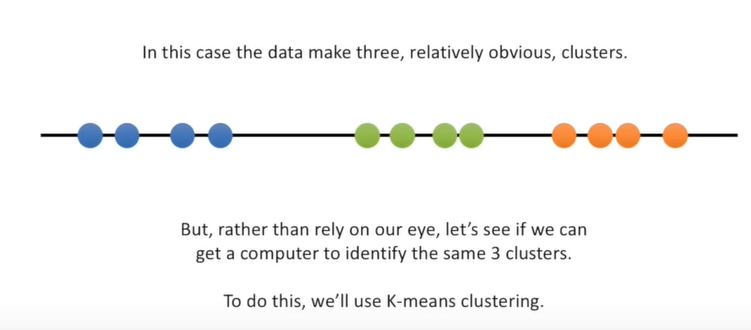

In the above case we can intuitively select the clusters, but not always the case
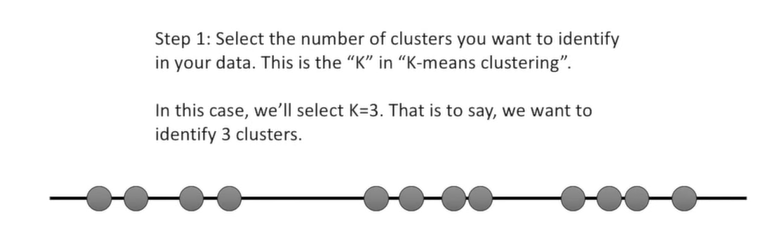

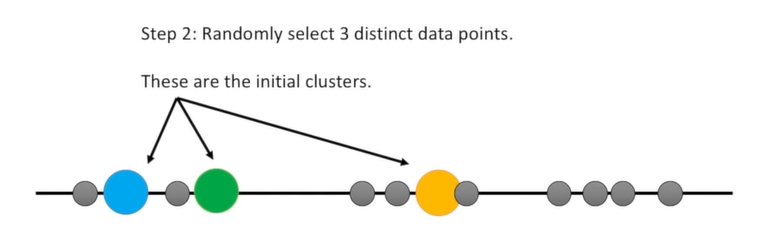
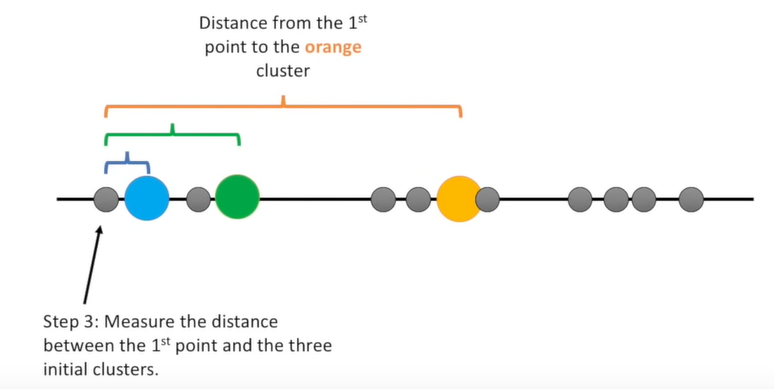
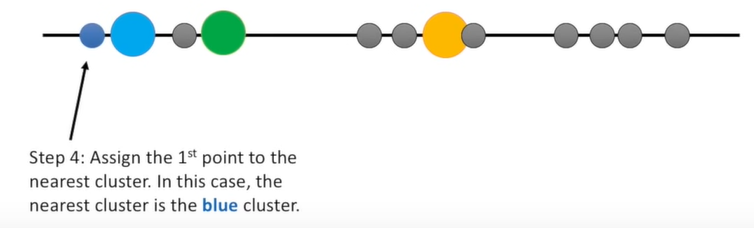
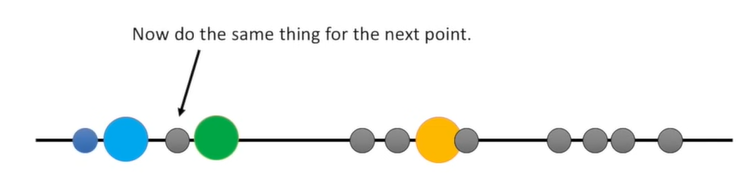
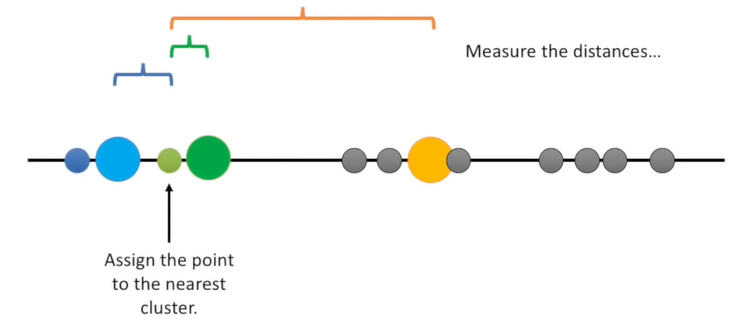

Just do that for all the points, measure the distances and assign the point to that cluster
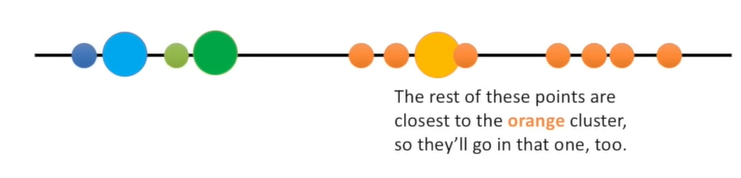
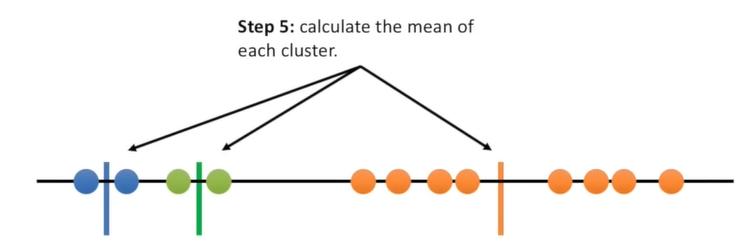

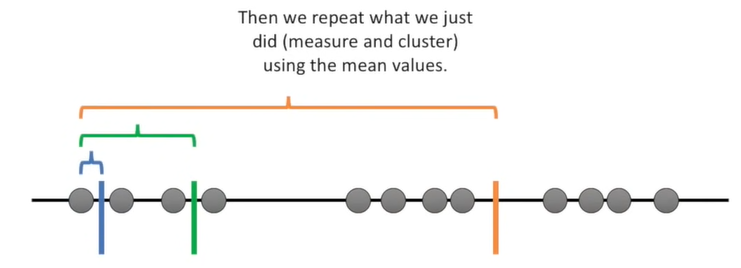
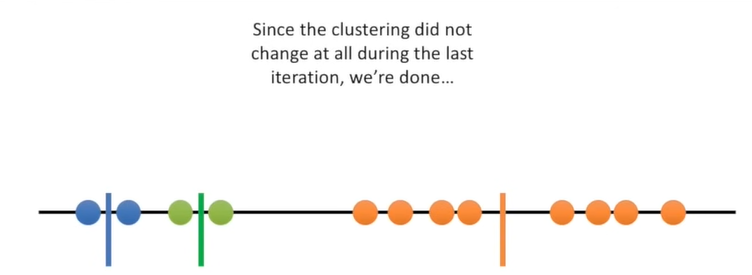

But, this clustering sucks, compared to what we did intutively.

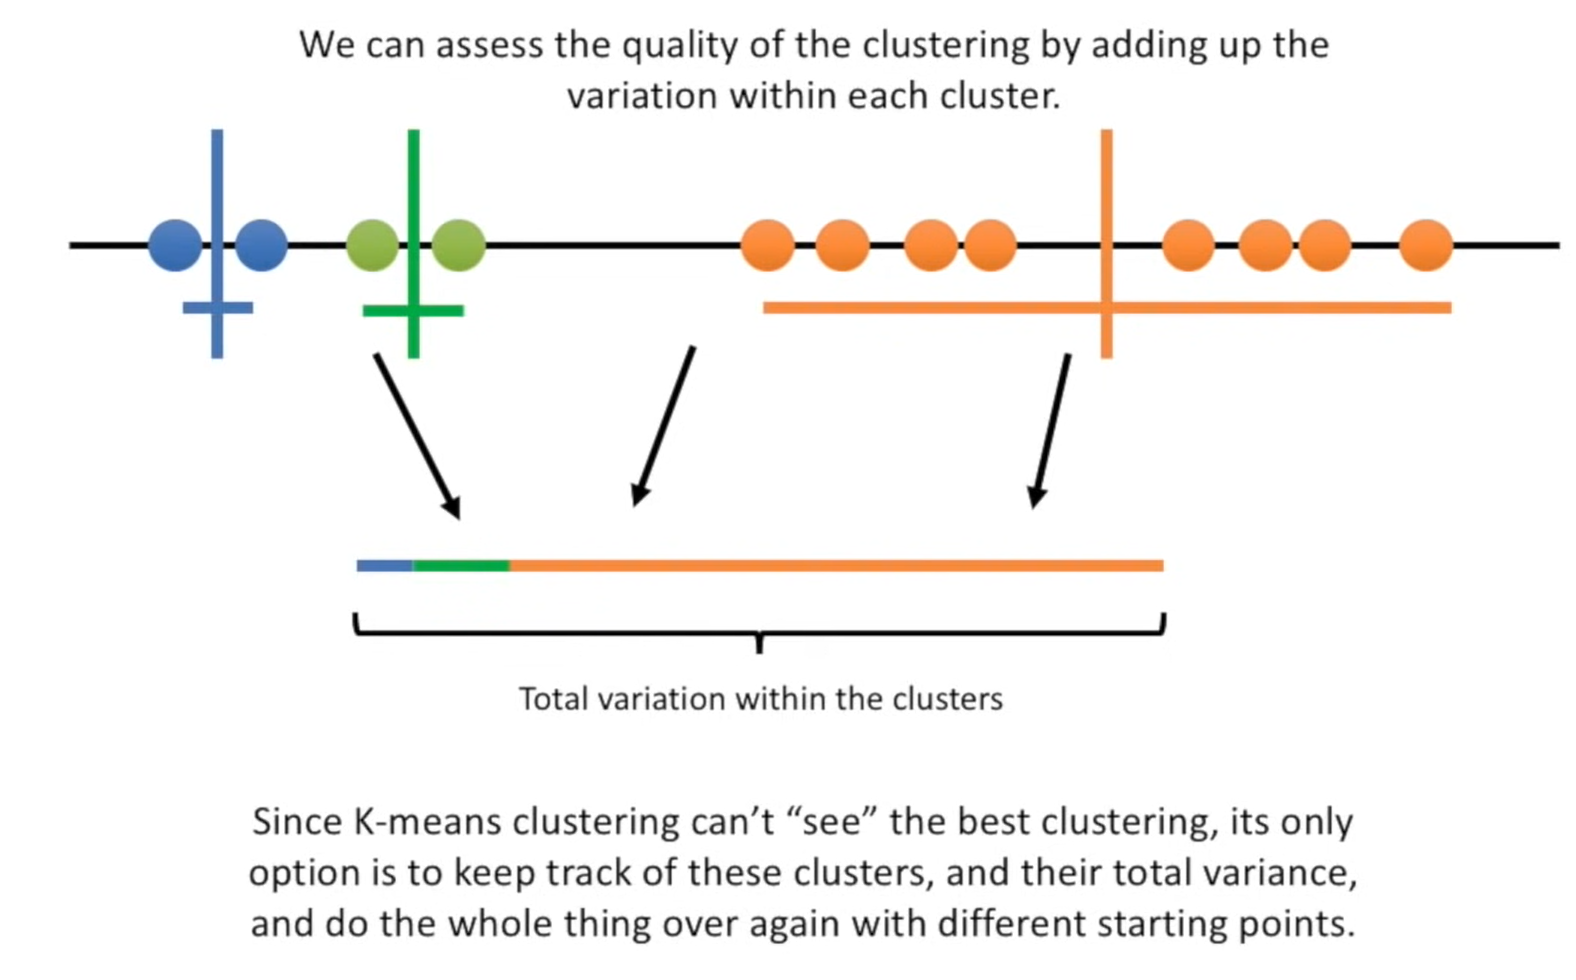

So, we go back to the beginning, select three random points, then clusters all the remaning points, calculates the mean of each cluster and then reclusters based on the new means. It repeats until the cluster no longer changes.

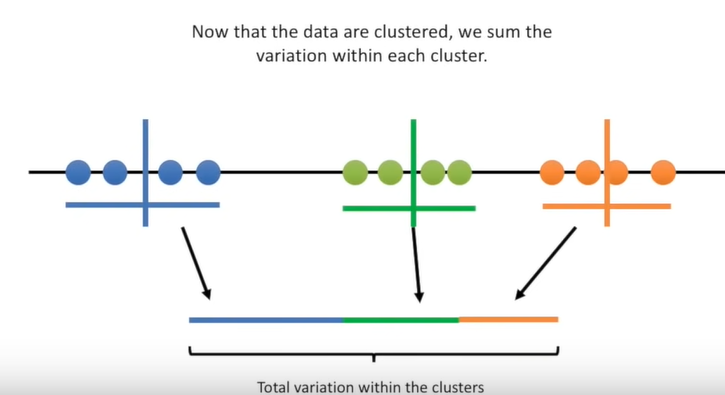

And then we repeat, after some clusterings

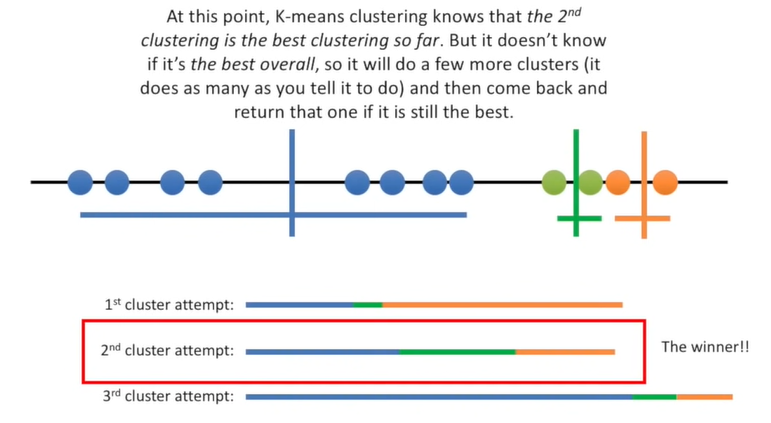

How, do you figure out what value of K to use?

One way to decide is to just try different values, and quantify the "goodness" of each clustering by finding the variance.
variance is sum of square of distances from mean/numbers of divided by data points.

The betterness or worseness of a Clustering type, can be quanitified by finding the variance.

The thing is each time you do add a new cluster, the total variation within each cluster will always be smaller than before. And when there's only one point per cluster, the variation will be 0. However that wouldn't be classification!
However, is we plot THE REDUCTION IN VALUE OF VARIANCE per value of K we can see:

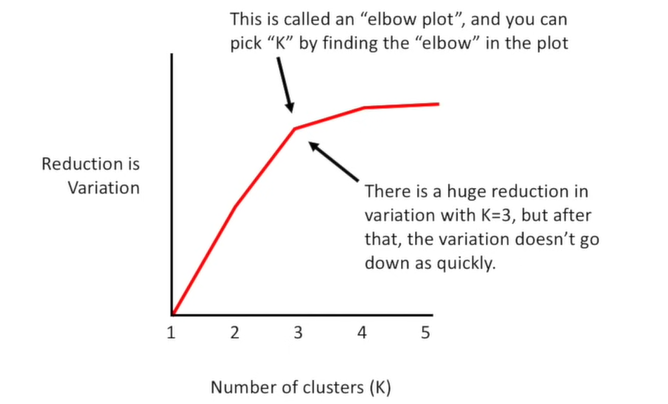

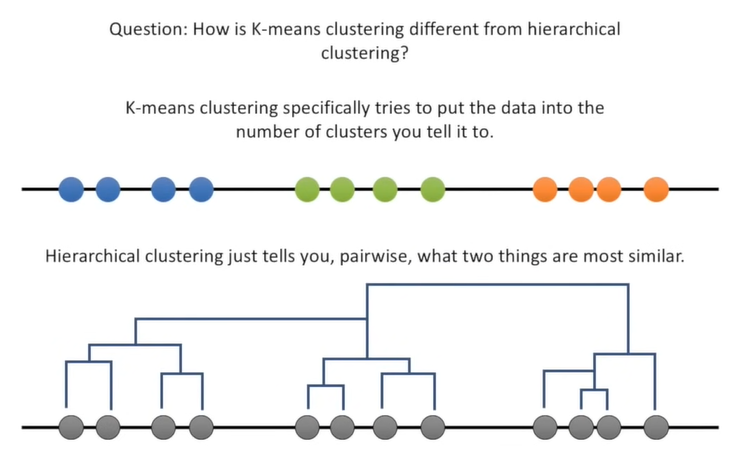

This concept, can just be extended to higher dimension feature values, in that case we find the norm of the distance from the nearest cluster point, and then square it and add.

For Heatmap data!
Just plot the data onto an n-dimensional graph and cluster accordingly

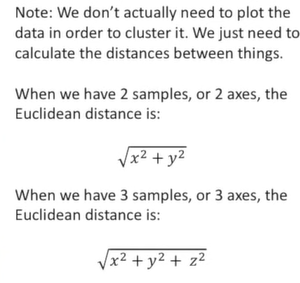

## Mathematics Short

We have three aspects of the algorithm:

1) Algorithm itself, to do the clustering, finding means, and repeating for new clusters
2) Metrics: Euclidean or Manhattan
3) Elbow Method to find best value of K

# What happens?
Essentially the algorithm is, for a given value of K, in the data points, set K random points as the cluster points, now go through each data point and assign them to the cluster based on it's distance from the cluster points sepearate all the data points into one of the K clusters. Now, assign the centroid of the K clusters to be the new cluster points. Repeat the above process of finding the distance, classfying and assigning mean as new cluster until the mean of clusters do not change and then you say you have found the best classification for that particular initial set of random K points. Now start with another set of K points and do all this again and find the best case. For each best case for a set of random K points find the total variance of the data. The best clustering for that K value will be the one with the mimimum variance value. And to find the best value of K you use the elbow method.

# K-Mean Clustering in Python

K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori.



K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

        Image segmentation
        Customer segmentation
        Species clustering
        Anomaly detection
        Clustering languages

The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. 

1st is Data Assignment Step to divide the data points amongst the clusters. 2nd is Centroid Update step which goes on till a stopping criterion is met.

Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

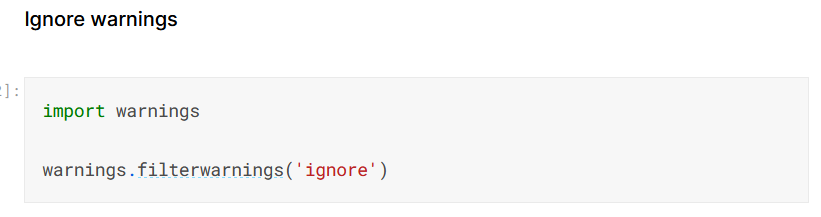

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

Inertia: WITHIN-CLUSTER SUM OF SQUARED.

The K-means algorithm aims to choose centroids that minimize the inertia

In [ ]:
#SKLEARN IMPLEMENTATION
from sklearn.cluster import KMeans
kmeans = KMeans(n_cluster=2, random_state=0)
kmeans.fit(X)

In [ ]:
#Model parameters study
kmeans.cluster_centers_
kmeans.inertia_

In [ ]:
#To check quality of weak classification if labels were given
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

In [ ]:
#Using Elbow Method
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300
                    , n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [1]:
#Now you can plot the elbow graph, find best K value and implements K-means for that value

# K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks

Clustering is used to get intuition about the structure of the data. It is essentially identifying subgroups in the data. 

Definition of K-Means: Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

Cost function (variance) we are trying to minimise: 
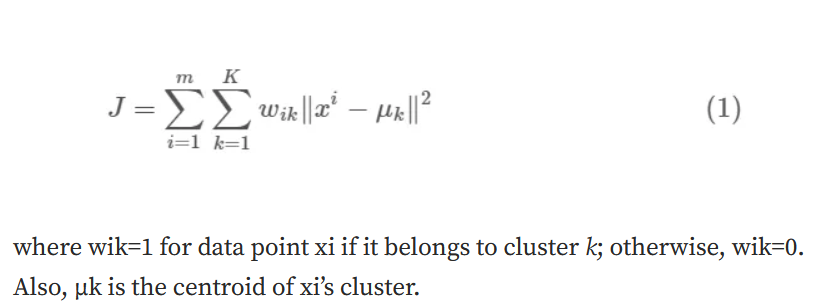

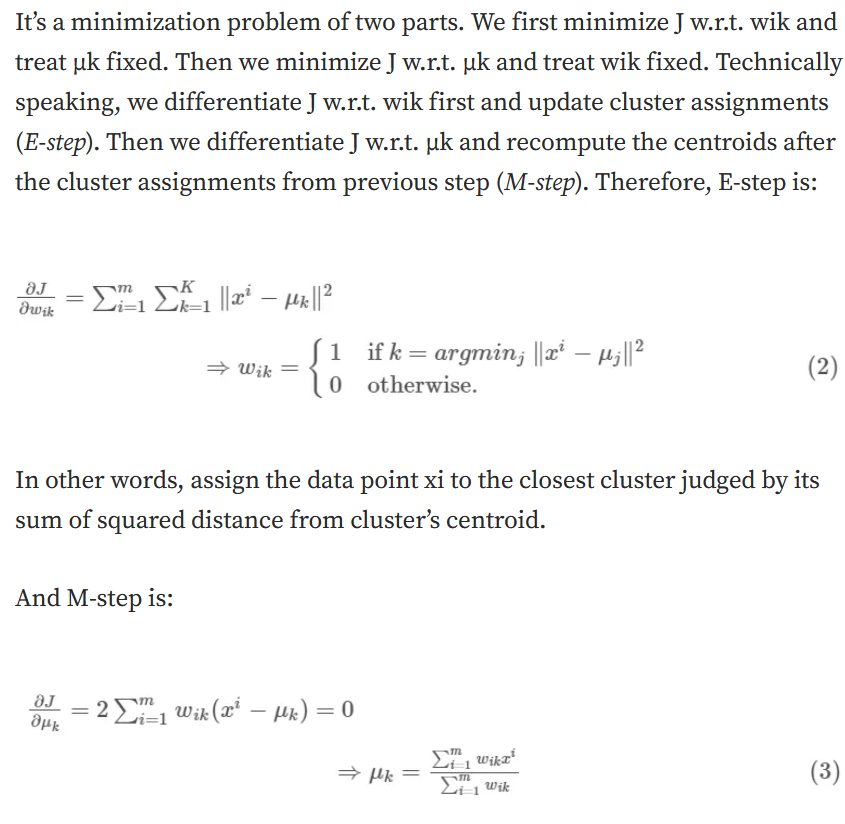

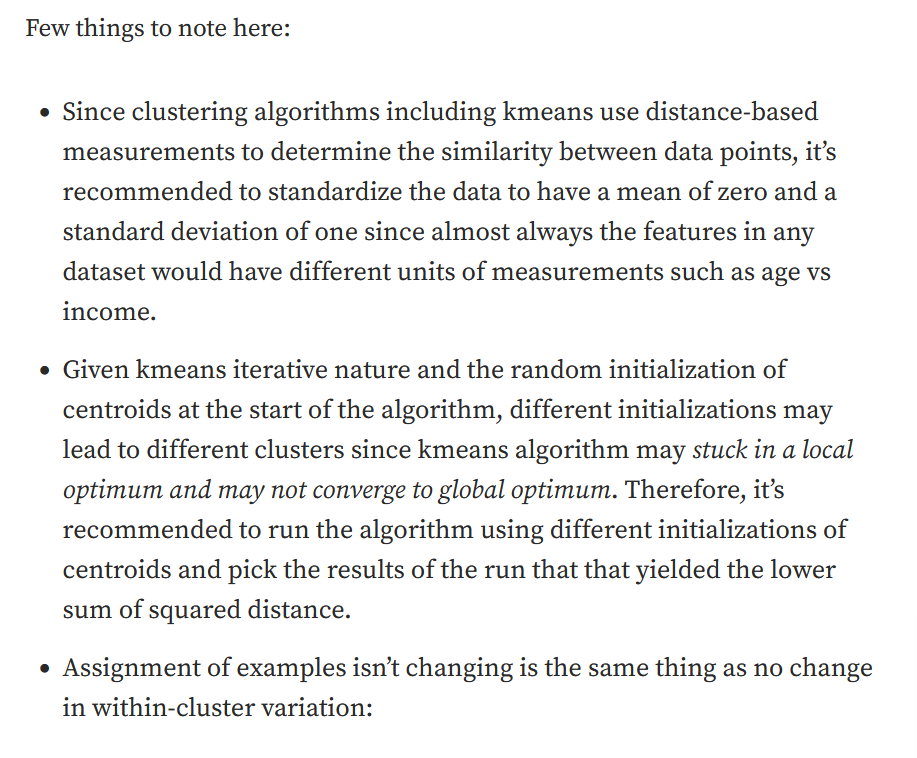

In [1]:
import numpy as np

In [3]:
from numpy.linalg import norm

In [42]:
#In this application we are only initialising one random set of
#starting points and just finding the best final position for
#that particular initial set, you need to run it again again
#to find the case with the minimum variance
class Kmeans:
    '''Implementing KMeans Algorithm'''
    
    def __init__(self,K: int=10, max_iter: int=100, random_state:int=123):
        self.K = K
        self.max_iter = max_iter
        self.random_state = random_state
    
    def initialise_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.K]]
        return centroids
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
    
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.K))
        for k in range(self.K):
            distance[:,k] = np.square(norm(X-centroids[k,:], axis =1))
        return distance
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.K):
            distance[labels==k] = norm(X[labels==k]-centroids[k],axis=1)
        return np.sum(np.square(distance))
    def fit(self, X):
        self.centroids = self.initialise_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

## Kmeans on Geyser’s Eruptions Segmentation

In [125]:
import pandas as pd

In [126]:
data = pd.read_csv('geyser.txt', sep='\t', lineterminator='\n')

In [127]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import time

In [128]:
from warnings import filterwarnings
filterwarnings('ignore')

Text(0.5, 1.0, 'Visualization of raw data')

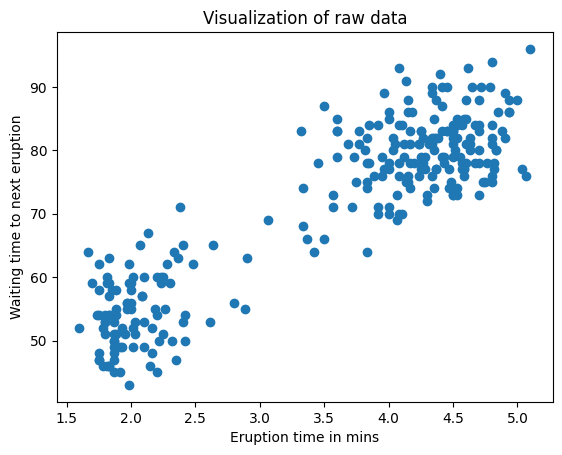

In [129]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

In [130]:
X_std = StandardScaler().fit_transform(data)

In [131]:
km = Kmeans(K=2, max_iter = 100, random_state=int(time.time()))

In [132]:
km.fit(X_std)

In [133]:
km.centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

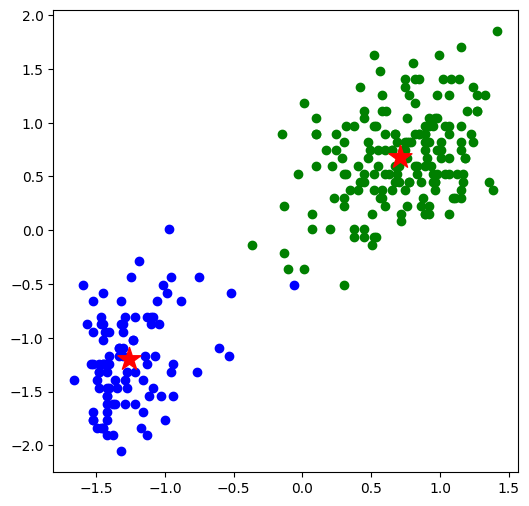

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')

# Kmeans on Image Compression
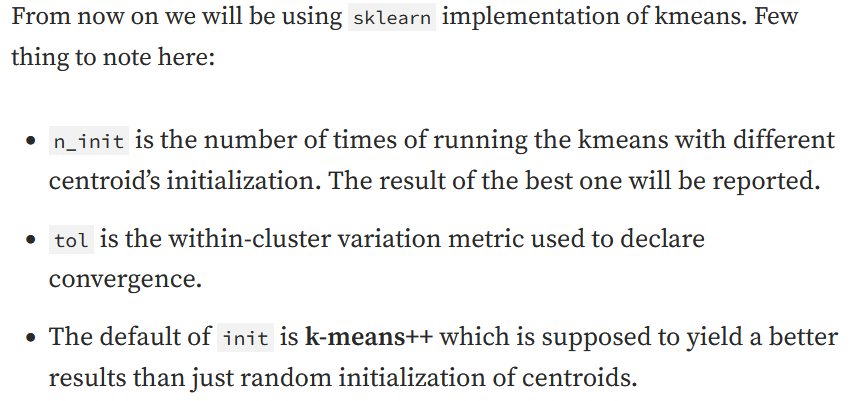

In [76]:
img = imread('main.jpeg')

In [78]:
img_size = img.shape

In [79]:
#This is 3 dimension data, i.e. each point in XY has 3 R, G & B Values

In [80]:
#we convert this to a 2 dimesional data

In [81]:
X = img.reshape(img_size[0]*img_size[1], img_size[2])

In [89]:
km = KMeans(n_clusters = 30)

In [90]:
km.fit(X)

KMeans(n_clusters=30)

In [99]:
#This gives final color of each point from one of the thirty colors
km.cluster_centers_[km.labels_]

array([[189.26901347,  91.28596262,  59.89569752],
       [189.26901347,  91.28596262,  59.89569752],
       [202.521354  , 116.25086998,  74.27143309],
       ...,
       [ 73.26730769,  57.53173077,  51.11538462],
       [ 73.26730769,  57.53173077,  51.11538462],
       [122.47849462,  78.14784946,  40.60752688]])

In [100]:
X_compressed = km.cluster_centers_[km.labels_]

In [101]:
X_compressed = np.clip(X_compressed.astype('uint8'),0,255)

In [102]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

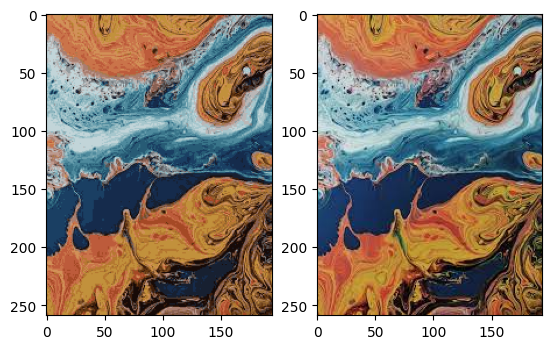

In [104]:
plt.subplot(1,2,1)
plt.imshow(X_compressed)
plt.subplot(1,2,2)
plt.imshow(img)

In [106]:
norm(X_compressed - img)

67642.93575089716

With smaller number of clusters we would have higher compression rate at the expense of image quality. As a side note, this image compression method is called lossy data compression because we can’t reconstruct the original image from the compressed image.

## Evaluation Methods of K-Means

Clustering analysis, unlike supervised learning, doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. 

Sometimes domain knowledge and intuition may help but usually that is not the case.

### TWO MAIN METRICS

#### ELBOW METHOD
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids.

Text(0, 0.5, 'Sum of squared distance')

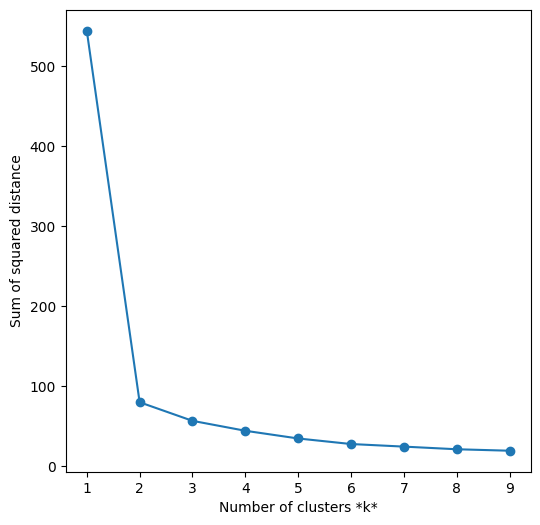

In [107]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

#### SILHOUETTE ANALYSIS
Silhouette analysis helps us to determine the degree of seperation between clusters. 
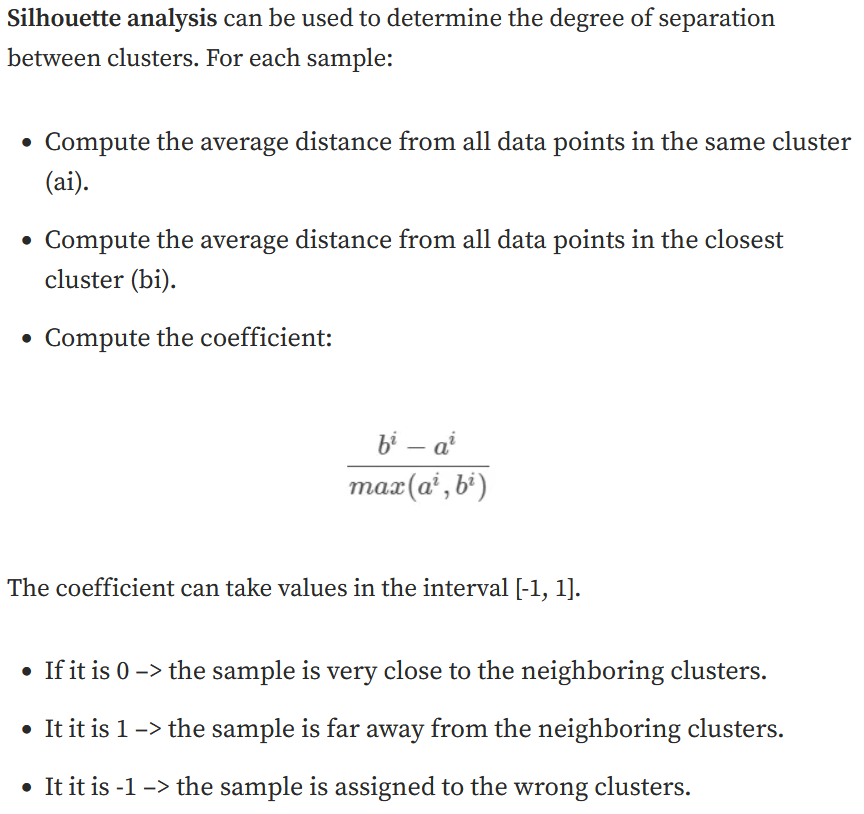

Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score.

So, we want the points the coefficient to have a large value close to 1.

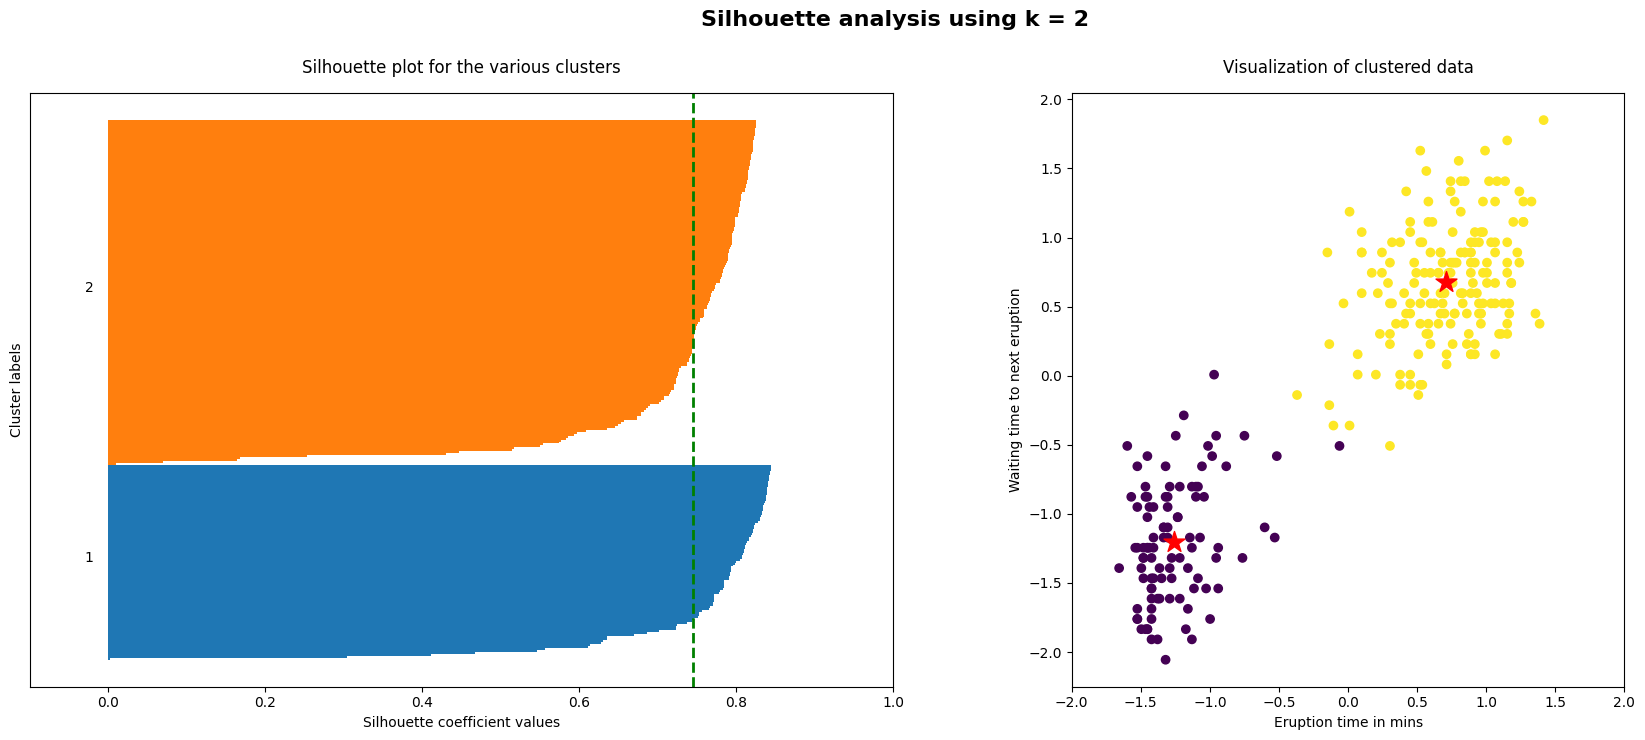

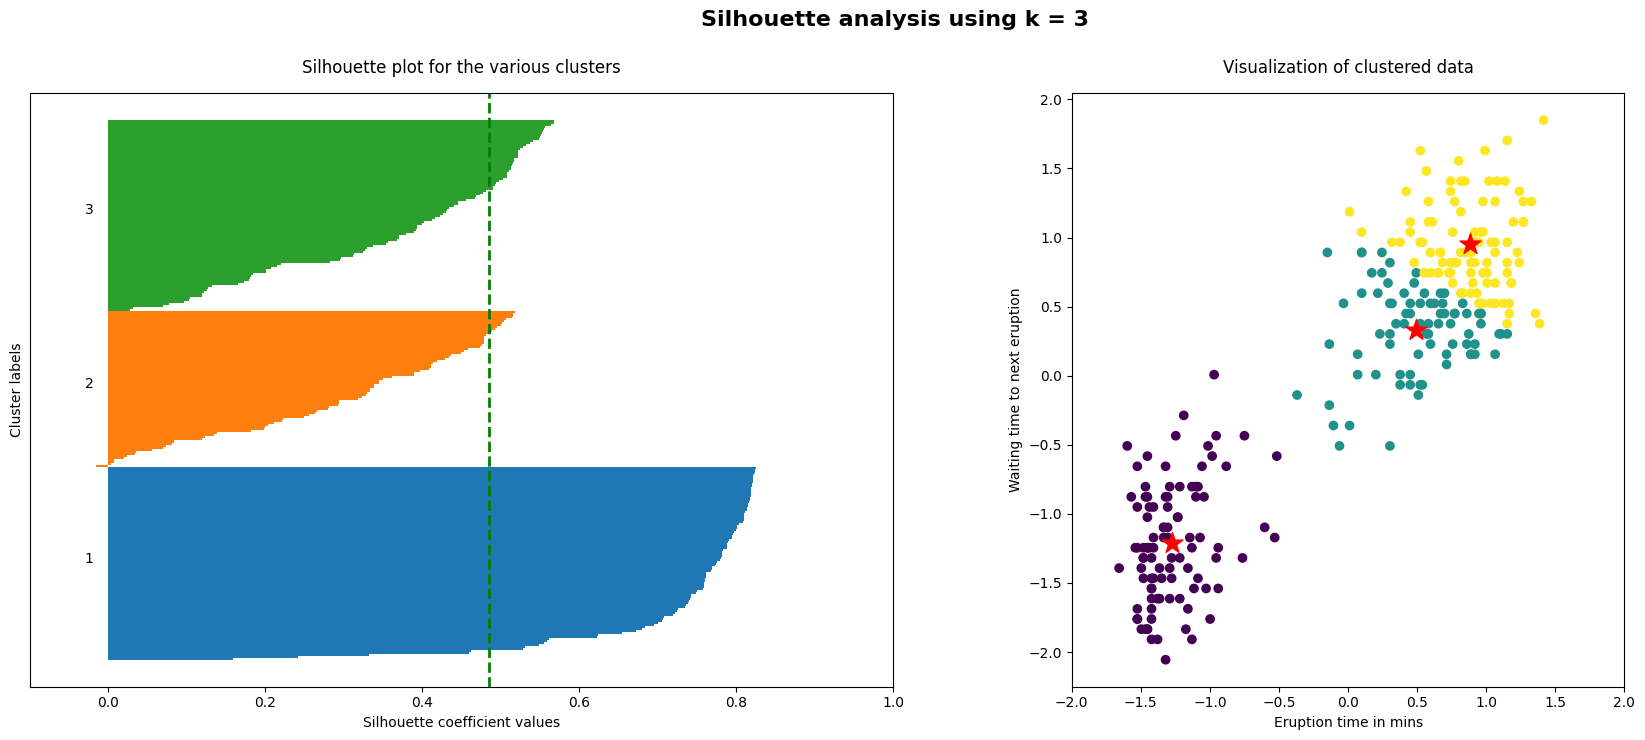

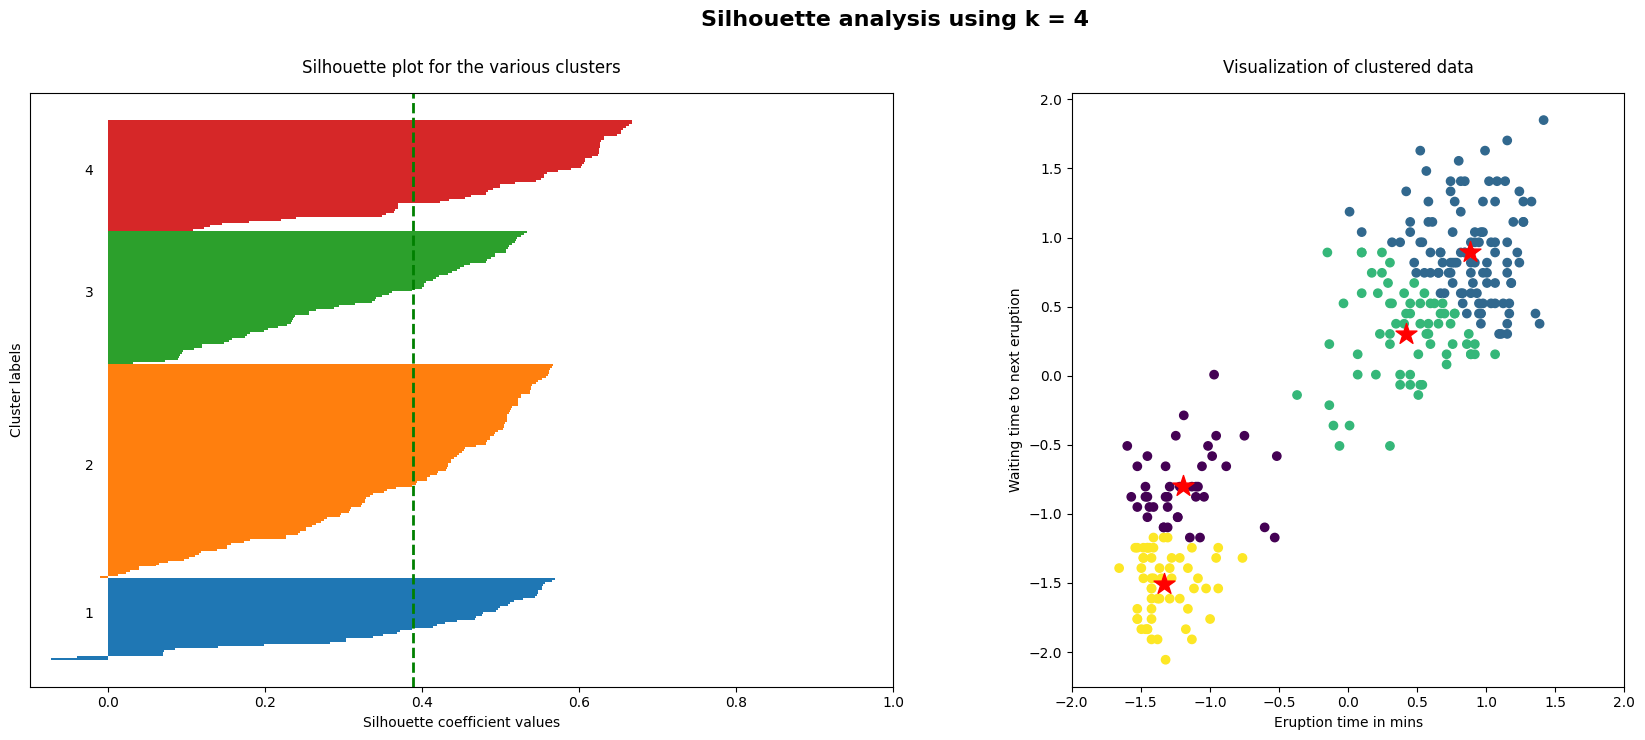

In [116]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

From above we can see, k=2 gives the highest silhouette score which is obvious for the given data points too

## Drawbacks of Kmeans

Kmeans algorithm is good in capturing structure of the data if clusters have a spherical-like shape. It always try to construct a nice spherical shape around the centroid. That means, the minute the clusters have a complicated geometric shapes, kmeans does a poor job in clustering the data. 

Examples in which it fails:
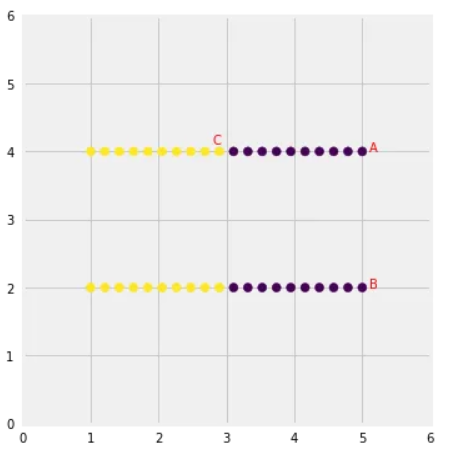
Note the Single Linkage hierarchical clustering method gets this right because it doesn’t separate similar points

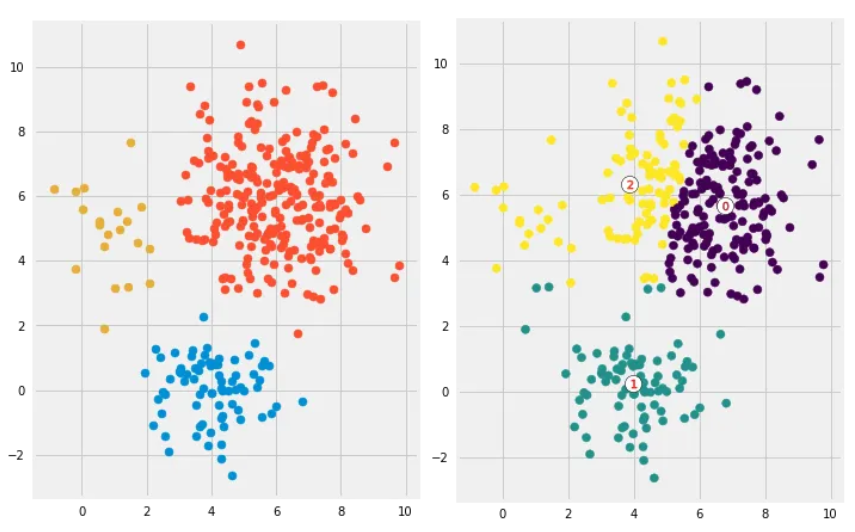

Looks like kmeans couldn’t figure out the clusters correctly. Since it tries to minimize the within-cluster variation, it gives more weight to bigger clusters than smaller ones. In other words, data points in smaller clusters may be left away from the centroid in order to focus more on the larger cluster.

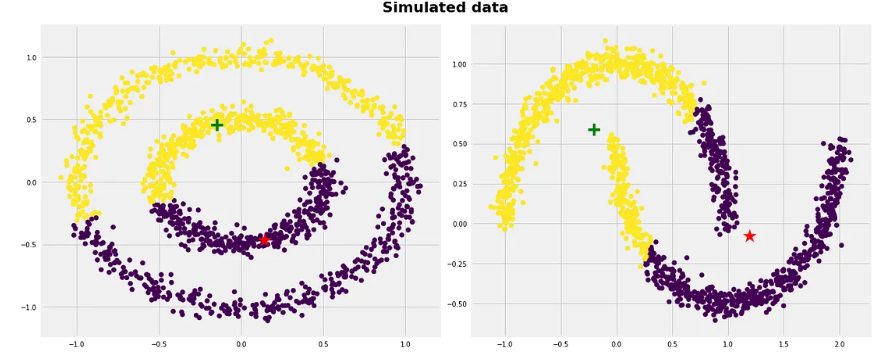
As expected, kmeans couldn’t figure out the correct clusters for both datasets. However, we can help kmeans perfectly cluster these kind of datasets if we use kernel methods.
 
The idea is we transform to higher dimensional representation that make the data linearly separable (the same idea that we use in SVMs).

Example: Spectral Clustering
    sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    sp.fit(X[0])
    labels = sp.labels_
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)

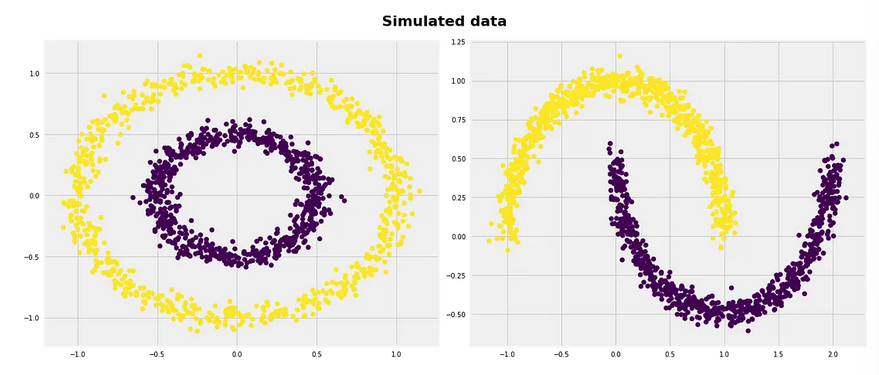

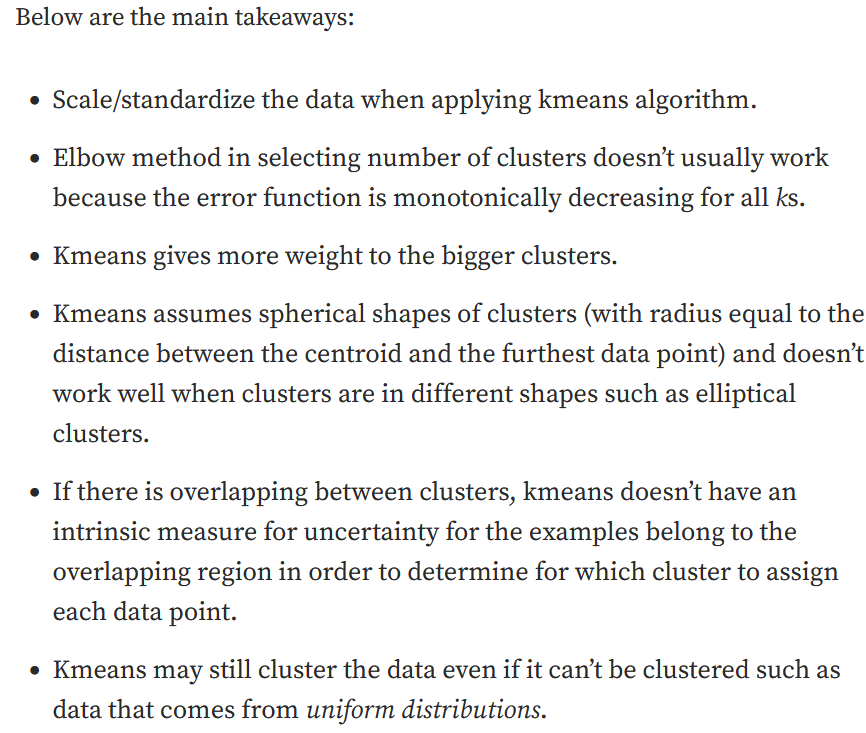

# KMeans from Scratch
https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch#Model-Implementation

By default KMeans just predicts for 1 randomly initialised set of points, to make it better we can iterate km.fit multiple times ans save the one with the least inertia

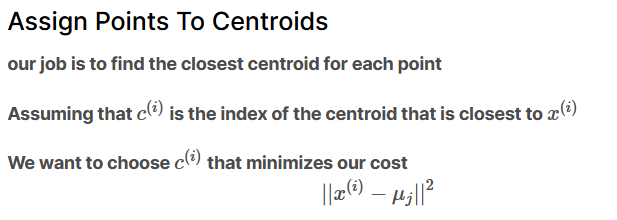

In [152]:
class Km:
    """
    K-Means clustering algorithm implementation.
    
    Parameters:
    K (int): number of clusters
    
    Attributes:
    K (int): number of clusters
    centroids (numpy.ndarray): array containing the centroids of each cluster
    """
    
    def __init__(self, K):
        self.K = K
    
    def initialise_centroids(self,X):
        """
        Initialize the centroids for each cluster by selecting K random points from the dataset.
        
        Parameters:
        X (numpy.ndarray): dataset to cluster
        
        Returns:
        None
        """
        
        randomised_X = np.random.permutation(X.shape[0])
        centroid_indx = randomised_X[:self.K] # get the indices for the centroids
        self.centroids = X[centroid_indx] # assign the centroids to the selected points
    
    def assign_points_centroids(self, X):
        """
        Assign each point in the dataset to the nearest centroid.
        
        Parameters:
        X (numpy.ndarray): dataset to cluster
        
        Returns:
        numpy.ndarray: array containing the index of the centroid for each point
        """
        X = np.expand_dims(X,axis=1) # expand dimensions to match shape of centroids
        distance = np.linalg.norm((X - self.centroids),axis=-1) # calculate Euclidean distance between each point and each centroid
        points = np.argmin(distance, axis=1) # assign each point to the closest centroid
        return points
    
    def compute_means(self, X, points):
        """
        Compute the mean of the points assigned to each centroid.
        
        Parameters:
        X (numpy.ndarray): dataset to cluster
        points (numpy.ndarray): array containing the index of the centroid for each point
        
        Returns:
        numpy.ndarray: array containing the new centroids for each cluster
        """
        centroids = np.zeros((self.K, X.shape[1])) # initialize array to store centroids
        for i in range(self.K):
            centroid_mean = X[points == i].mean(axis=0) # calculate mean of the points assigned to the current centroid
            centroids[i] = centroid_mean # assign the new centroid to the mean of its points
        return centroids
    
    def fit(self, X, iterations=10):
        """
        Cluster the dataset using the K-Means algorithm.
        
        Parameters:
        X (numpy.ndarray): dataset to cluster
        iterations (int): number of iterations to perform (default=10)
        
        Returns:
        numpy.ndarray: array containing the final centroids for each cluster
        numpy.ndarray: array containing the index of the centroid for each point
        """
        
        self.initialise_centroids(X) # initialize the centroids
        for i in range(iterations):
            points = self.assign_points_centroids(X) # assign each point to the nearest centroid
            self.centroids = self.compute_means(X, points) # compute the new centroids based on the mean of their points
        return self.centroids, points

In [153]:
km2 = Km(2)

In [157]:
centroids, points = km2.fit(X_std)

In [163]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X_std[points == 0, 0], y=X_std[points == 0, 1],
    mode='markers',marker_color='#DB4CB2'
))

fig.add_trace(go.Scatter(
    x=X_std[points == 1, 0], y=X_std[points == 1, 1],
    mode='markers',marker_color='#c9e9f6'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,)